# Power Curve of the E. Portfolio

Below is the power curve for the power plants within the E. portfolio.

In [1]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16_
import utils
import importlib
# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = """
SELECT * 
FROM POWER_CURVE_QH_HISTORY 
WHERE CALENDAR_QH_END_DATE > '2019-01-01'
  AND ID_CURVE_SOURCE = 1
"""
power_curve = fetch_db_table_sqlserver16_(sql=sql_query, verbose=False)
power_curve = power_curve.sort_values(by='CALENDAR_QH_END_DATE')

power_curve

c:\imbalance_forecast\src\open_data.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ID_POD,ID_POWER_CURVE_TYPE,CALENDAR_QH_START_DATE,CALENDAR_QH_START_HOUR,CALENDAR_QH_END_DATE,CALENDAR_QH_END_HOUR,CURVE_VALUE_kWh,POWER_VALUE_kW,LOADTIME,ID_CURVE_STATUS,ID_CURVE_SOURCE,FILE_NAME,OUT_OF_COMMISSION
526,245,2,2024-08-26 11:15:00,12,2024-08-26 11:30:00,12,237.158,948.63,2024-08-26 11:30:30.027,3,1,thingsboard_12_15,0
242,725,2,2024-08-26 11:15:00,12,2024-08-26 11:30:00,12,78.798,315.19,2024-08-26 11:30:30.027,3,1,thingsboard_12_15,0
241,2287,2,2024-08-26 11:15:00,12,2024-08-26 11:30:00,12,99.895,399.58,2024-08-26 11:30:30.027,3,1,thingsboard_12_15,0
240,2726,2,2024-08-26 11:15:00,12,2024-08-26 11:30:00,12,0.000,0.00,2024-08-26 11:30:30.027,3,1,thingsboard_12_15,0
239,181,2,2024-08-26 11:15:00,12,2024-08-26 11:30:00,12,283.563,1134.25,2024-08-26 11:30:30.027,3,1,thingsboard_12_15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650468,395,2,2024-11-27 09:15:00,10,2024-11-27 09:30:00,10,36.750,147.00,2024-11-27 09:36:00.000,3,1,thingsboard_10_15,0
2650467,364,2,2024-11-27 09:15:00,10,2024-11-27 09:30:00,10,56.250,225.00,2024-11-27 09:36:00.000,3,1,thingsboard_10_15,0
2650466,386,2,2024-11-27 09:15:00,10,2024-11-27 09:30:00,10,76.875,307.50,2024-11-27 09:36:00.000,3,1,thingsboard_10_15,0
2650473,1092,2,2024-11-27 09:15:00,10,2024-11-27 09:30:00,10,9.863,39.45,2024-11-27 09:36:00.000,3,1,thingsboard_10_15,0


In [2]:
unique_id_curve_type = power_curve['ID_POWER_CURVE_TYPE'].unique()

# Convert to list if needed
id_curve_list = unique_id_curve_type.tolist()

# Display the unique energy sources
print(id_curve_list)

[2]


In [3]:
unique_id_curve_status = power_curve['ID_CURVE_STATUS'].unique()

# Convert to list if needed
id_curve_status_list = unique_id_curve_status.tolist()

# Display the unique energy sources
print(id_curve_status_list)

[3]


In [4]:
unique_id_pod = power_curve['ID_POD'].unique()

# Convert to list if needed
id_curve_pod_list = unique_id_pod.tolist()

# Display the unique energy sources
print(id_curve_pod_list)

[245, 725, 2287, 2726, 181, 15, 968, 894, 892, 724, 1022, 969, 970, 891, 859, 2705, 2706, 237, 738, 924, 2566, 723, 3122, 212, 2382, 2381, 98, 379, 267, 259, 2150, 722, 493, 275, 2147, 305, 313, 336, 251, 2148, 2624, 269, 1083, 238, 2620, 852, 500, 734, 522, 710, 185, 520, 681, 496, 2934, 1024, 148, 149, 150, 178, 175, 2524, 2527, 2140, 492, 95, 2155, 49, 350, 464, 1078, 1079, 3132, 1110, 328, 325, 733, 335, 664, 2154, 2153, 3085, 2643, 2159, 2158, 2156, 1074, 2526, 514, 530, 2576, 2577, 290, 884, 226, 248, 414, 474, 2180, 705, 2414, 330, 2181, 88, 2168, 673, 689, 359, 380, 358, 2404, 2419, 3115, 2938, 2625, 904, 2145, 2144, 3119, 3120, 2725, 903, 2900, 3076, 3050, 3065, 2337, 2315, 2322, 2321, 3072, 882, 874, 866, 741, 521, 1027, 2615, 571, 744, 517, 1054, 112, 1055, 523, 519, 57, 277, 728, 20, 2142, 109, 1056, 91, 572, 837, 322, 2405, 401, 2716, 2182, 2866, 2719, 2720, 2928, 2632, 2740, 2741, 2185, 586, 584, 583, 585, 836, 282, 529, 2525, 2682, 2609, 364, 365, 395, 397, 396, 398, 385

In [5]:
# Group by CALENDAR_QH_END_DATE and sum relevant columns
result = power_curve.groupby('CALENDAR_QH_END_DATE')[['CURVE_VALUE_kWh', 'POWER_VALUE_kW']].sum().reset_index()
result

,CALENDAR_QH_END_DATE,CURVE_VALUE_kWh,POWER_VALUE_kW
0,2024-08-26 11:30:00,54603.943,218415.58
1,2024-08-26 11:45:00,55066.944,220267.56
2,2024-08-26 12:00:00,55740.513,222961.80
3,2024-08-26 12:15:00,56074.947,224299.57
4,2024-08-26 12:30:00,55602.512,222409.83
...,...,...,...
8832,2024-11-27 08:30:00,55116.694,220466.57
8833,2024-11-27 08:45:00,56167.314,224669.05
8834,2024-11-27 09:00:00,57711.390,230845.33
8835,2024-11-27 09:15:00,59173.488,236693.75


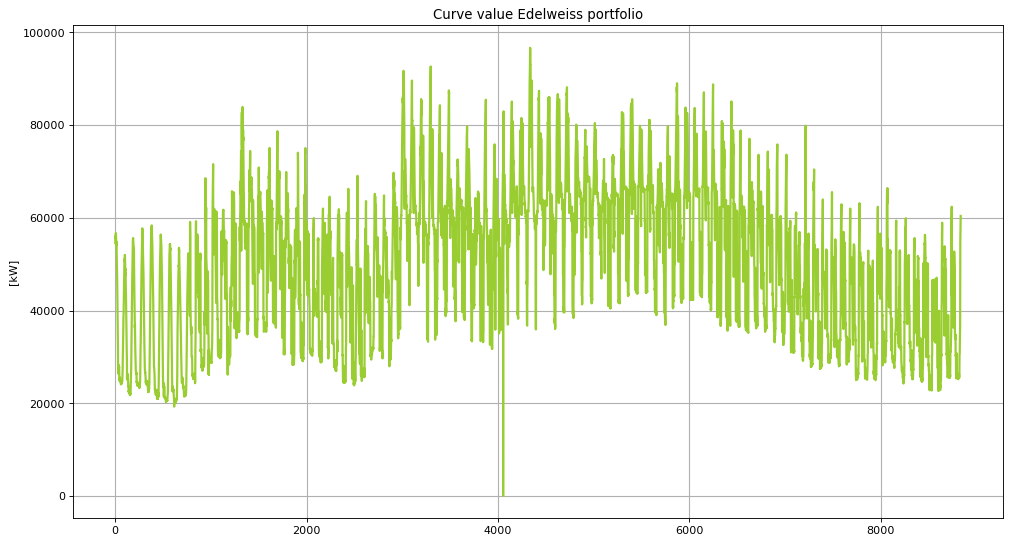

In [6]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(result["CURVE_VALUE_kWh"], linewidth=2, color = "yellowgreen") 

ax.set_title("Curve value Edelweiss portfolio"); ax.set_ylabel("[kW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

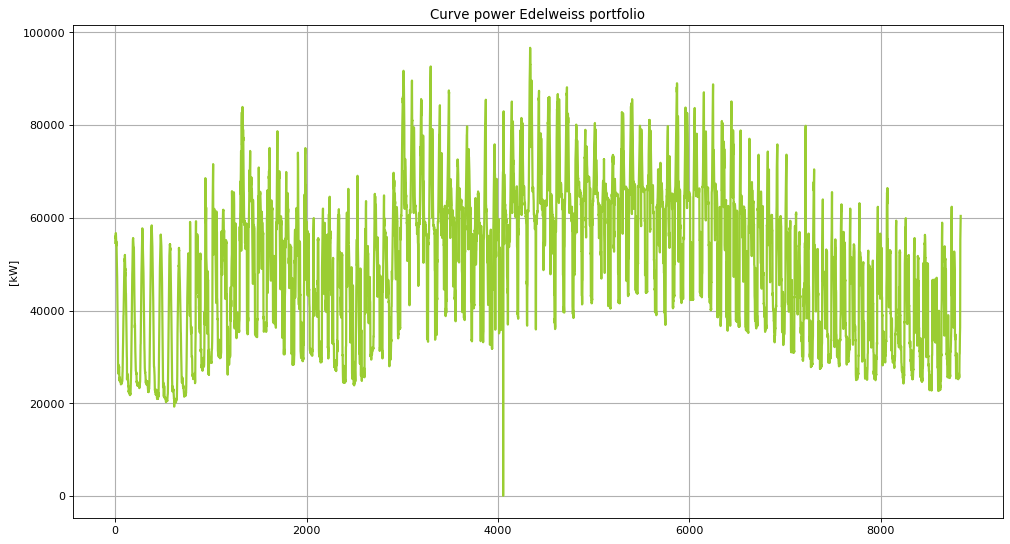

In [7]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(result["CURVE_VALUE_kWh"], linewidth=2, color = "yellowgreen") 

ax.set_title("Curve power Edelweiss portfolio"); ax.set_ylabel("[kW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()